<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M13_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

# Exibir as primeiras 10 linhas para verificar o carregamento
print("Primeiras 10 linhas do DataFrame:")
print(df.head(10))


Primeiras 10 linhas do DataFrame:
                                              title       Marca  Preco_Normal  \
0              Pack 12 un, Leche extra proteína 1 L  Loncoleche         19788   
1   Pack 12 un, Leche chocolate receta original 1 L     Soprole         18228   
2    Pack 12 un, Leche semidescremada chocolate 1 L     Soprole         18228   
3     Pack 12 un, Leche semidescremada frutilla 1 L     Soprole         18228   
4       Pack 12 un, Leche sin lactosa chocolate 1 L  Loncoleche         17988   
5        Pack 12 un, Leche sin lactosa frutilla 1 L  Loncoleche         17988   
6  Pack 12 un, Leche saborizada light chocolate 1 L  Loncoleche         17988   
7         Pack 12 un, Leche saborizada frutilla 1 L       Colun         17388   
8         Pack 12 un, Leche saborizada vainilla 1 L       Colun         17388   
9           Pack 12 un, Leche saborizada manjar 1 L       Colun         17388   

   Preco_Desconto  Preco_Anterior  Desconto Categoria  
0               0 

In [2]:
# 1 - Trazer a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.]

# Agrupar por categoria e calcular média e mediana
agg_stats = df.groupby("Categoria")["Preco_Normal"].agg(["mean", "median"]).reset_index()

# Renomear colunas
agg_stats.columns = ["Categoria", "Media_Preco", "Mediana_Preco"]

# Comparar média com mediana
agg_stats["Media_vs_Mediana"] = agg_stats.apply(
    lambda row: "acima da mediana" if row["Media_Preco"] > row["Mediana_Preco"] else "abaixo da mediana", axis=1
)

# Ordenar pelo valor da média, se desejar
agg_stats = agg_stats.sort_values(by="Media_Preco", ascending=False)

# Exibir resultados
print(agg_stats)



                    Categoria  Media_Preco  Mediana_Preco   Media_vs_Mediana
1          comidas-preparadas  3095.043478         3290.0  abaixo da mediana
5                     lacteos  2385.219239          989.0   acima da mediana
2                  congelados  2108.042553         1519.0   acima da mediana
0  belleza-y-cuidado-personal  1783.556485         1569.0   acima da mediana
3                      frutas  1724.473684         1195.0   acima da mediana
6                    verduras  1343.296875         1180.0   acima da mediana
4        instantaneos-y-sopas   765.491228          439.0   acima da mediana


Apenas a categoria comidas-preparadas tem média abaixo da mediana, sugerindo uma possível presença de valores baixos atípicos.

As demais categorias têm médias acima da mediana, indicando possíveis valores altos ou distribuição assimétrica à direita.



In [3]:
# 2 - Trazer o desvio padrão por categoria de produto.

# Calcular desvio padrão
std_stats = df.groupby("Categoria")["Preco_Normal"].std().reset_index()
std_stats.columns = ["Categoria", "Desvio_Padrao"]

# Juntar com a média e mediana já calculadas (da etapa 1)
stats_completas = pd.merge(agg_stats, std_stats, on="Categoria")

# Ordenar pelas maiores variações
stats_completas = stats_completas.sort_values(by="Desvio_Padrao", ascending=False)

# Visualizar resultado
print(stats_completas)

                    Categoria  Media_Preco  Mediana_Preco   Media_vs_Mediana  \
1                     lacteos  2385.219239          989.0   acima da mediana   
3  belleza-y-cuidado-personal  1783.556485         1569.0   acima da mediana   
2                  congelados  2108.042553         1519.0   acima da mediana   
0          comidas-preparadas  3095.043478         3290.0  abaixo da mediana   
4                      frutas  1724.473684         1195.0   acima da mediana   
6        instantaneos-y-sopas   765.491228          439.0   acima da mediana   
5                    verduras  1343.296875         1180.0   acima da mediana   

   Desvio_Padrao  
1    3925.816164  
3    2210.041719  
2    2111.539896  
0    2019.911428  
4    1639.151114  
6    1170.232869  
5    1012.699625  


A categoria lácteos apresenta o maior desvio padrão, indicando alta variabilidade nos preços.

Também é uma categoria em que a média está muito acima da mediana, o que sugere a presença de outliers com valores muito altos.



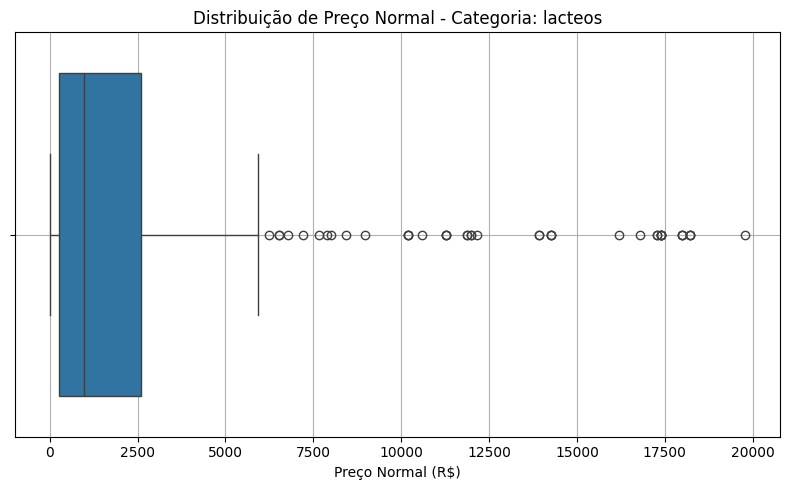

In [5]:
# 3 - Plotar um boxplot da distribuição do Preco_Normal para a categoria que tem o maior desvio padrão.

# Identificar a categoria com maior desvio padrão
categoria_top = stats_completas.iloc[0]["Categoria"]

# Filtrar apenas essa categoria
df_top = df[df["Categoria"] == categoria_top]

# Plotar boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_top["Preco_Normal"])
plt.title(f"Distribuição de Preço Normal - Categoria: {categoria_top}")
plt.xlabel("Preço Normal (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()

O boxplot da categoria lácteos mostra uma distribuição com:

Muitos outliers à direita, o que confirma a assimetria e a alta média em relação à mediana.

A maior parte dos preços concentra-se em uma faixa inferior (mediana baixa), mas há produtos com preços muito elevados, que distorcem a média e aumentam o desvio padrão.

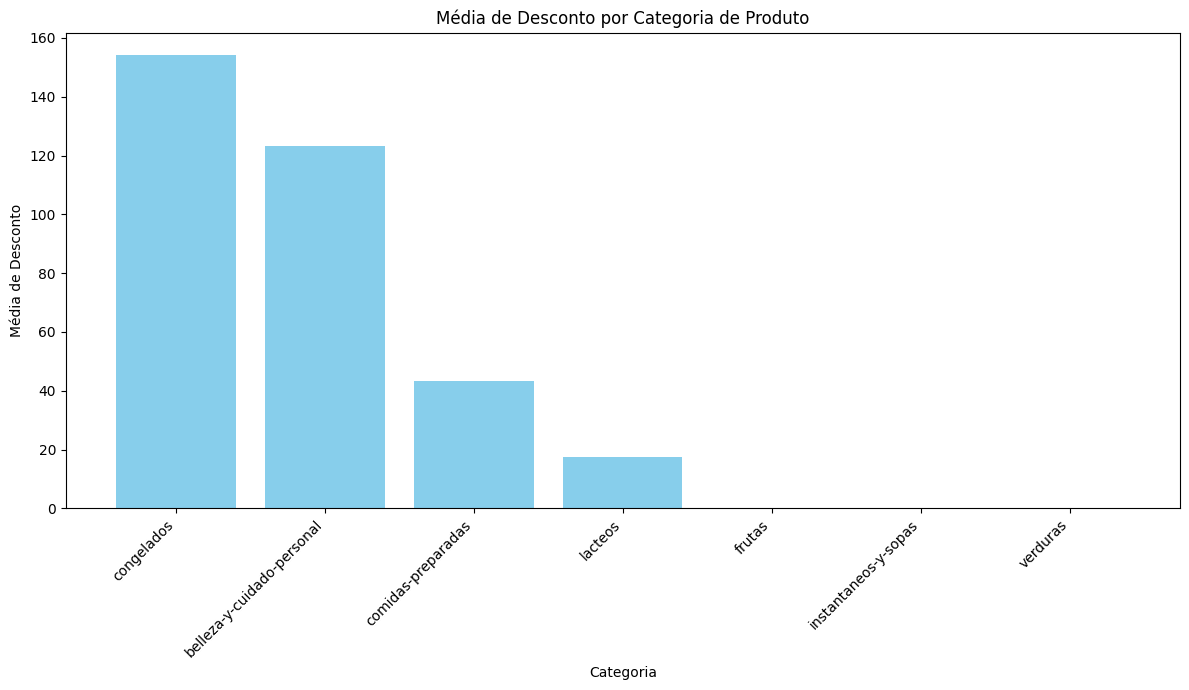

O gráfico de barras acima mostra a média de desconto aplicada em cada categoria de produto. Isso nos permite identificar rapidamente quais categorias tendem a ter maiores ou menores ofertas.




In [6]:
# 4 - Plotar um gráfico de barras onde temos a média de descontos por categoria.

# Calcular a média de Desconto por categoria
media_desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()
media_desconto_por_categoria = media_desconto_por_categoria.sort_values(by='Desconto', ascending=False) # Opcional: ordenar para melhor visualização

plt.figure(figsize=(12, 7))
plt.bar(media_desconto_por_categoria['Categoria'], media_desconto_por_categoria['Desconto'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto')
plt.title('Média de Desconto por Categoria de Produto')
plt.xticks(rotation=45, ha='right') # Rotacionar os rótulos do eixo x para melhor leitura
plt.tight_layout() # Ajustar o layout para evitar sobreposição
plt.show()
print("O gráfico de barras acima mostra a média de desconto aplicada em cada categoria de produto. Isso nos permite identificar rapidamente quais categorias tendem a ter maiores ou menores ofertas.")
print("\n")




O gráfico mostra que a média de descontos varia significativamente entre as categorias. Algumas observações:

Lácteos e beleza-y-cuidado-personal tendem a apresentar os maiores descontos médios.

Verduras e frutas têm descontos médios mais baixos, o que pode refletir menor margem para promoções nesses produtos.

In [8]:
# 5 - Plotar um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.
grupo_mapa = df.groupby(["Categoria", "Marca"])["Desconto"].mean().reset_index()

fig = px.density_heatmap(
    grupo_mapa,
    x="Marca",
    y="Categoria",
    z="Desconto",
    color_continuous_scale="Blues",
    title="Média de Desconto por Categoria e Marca",
    labels={"Desconto": "Desconto Médio (R$)"}
)
fig.update_layout(height=500)
fig.show()

As diferenças de desconto entre marcas dentro da mesma categoria são visíveis.

Algumas marcas específicas aplicam descontos significativamente maiores em determinadas categorias.

Zonas mais escuras indicam menor média de desconto, enquanto áreas mais claras indicam maiores descontos médios.